In [27]:
import matplotlib.pyplot as plt
import os
import json
import sys
from cycler import cycler
import re
from statistics import mean, median

In [ ]:
markercycle = cycler(marker=['o', '+', 'x', '*', '.', 'X'])
colorcycle = cycler(color=['blue', 'orange', 'green', 'magenta'])

libraries = ["libressl", "openssl", "mbedtls", "gnutls", "matrixssl"]

# Make a scatter plot of unique discrepancies vs total discrepancies for all models
results_dir = "/mnt/6TB/dockerMLcerts/attached_dir/all_results/testing-results"
code_coverage_dir = "/mnt/6TB/dockerMLcerts/attached_dir/all_results/coverage"

# Iterate through results, ignoring 00000 or 11111, and only including discrepancies (i.e., 11011)
models_disc = {}
models_code_coverage = {}
for arch_dir in reversed(os.listdir(results_dir)):
    print("Now processing architecture ", arch_dir, "...")
    
    if arch_dir != "v3" and arch_dir != "transcert" and arch_dir != "frankencerts-large" and arch_dir != "zmapOriginalCerts":
        continue
        
    for dir in os.listdir(results_dir + "/" + arch_dir):        
        if "seeds10k" in dir:
            continue
        
        print("Now processing model ", dir, "...")
        models_disc[arch_dir + "/" + dir] = []
        for f in os.listdir(results_dir + "/" + arch_dir + "/" + dir + "/json/"):
            if ".json" in f:
                with open(results_dir + "/" + arch_dir + "/" + dir + "/json/" + f) as oF:
                    data = json.load(oF)
                    this_pattern = ""
                    for elem in data:
                        this_pattern += str((int(data[elem] != 0)))
                    if not (this_pattern == '00000' or this_pattern == '11111'):
                        models_disc[arch_dir + "/" + dir].append(this_pattern)
 
        # Now include code coverage data
        coverages = {}
        for l in libraries:
            try: 
                with open(code_coverage_dir + "/" + arch_dir + "/" + dir + "/" + l + "/lcov-results/index.html", 'r') as cF:
                    result = re.findall(r"<td class=\"headerCovTableEntryLo\">(.+) %</td>", cF.read())
                    # function coverage, 0 for line coverage
                    coverages[l] = float(result[1])
            except:
                coverages[l] = 0
                print("EXCEPTION EXCEPTION")
        print("Code coverage for ", dir, coverages)
        print("Median", median(list(coverages.values())))
        models_code_coverage[arch_dir + "/" + dir] = median(list(coverages.values()))

Now processing architecture  transcert ...
Now processing model  seeds30k ...
Code coverage for  seeds30k {'libressl': 11.5, 'openssl': 12.7, 'mbedtls': 11.9, 'gnutls': 9.3, 'matrixssl': 15.5}
Median 11.9
Now processing architecture  v3-experiments ...
Now processing architecture  v3-experiments-extra ...
Now processing architecture  zmapOriginalCerts ...
Now processing model  zmapOriginalCerts ...
Code coverage for  zmapOriginalCerts {'libressl': 13.2, 'openssl': 15.4, 'mbedtls': 14.2, 'gnutls': 9.5, 'matrixssl': 17.0}
Median 14.2
Now processing architecture  frankencerts ...
Now processing architecture  v3 ...
Now processing model  2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000 ...
Code coverage for  2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000 {'libressl': 11.3, 'openssl': 12.4, 'mbedtls': 12.2, 'gnutls': 8.8, 'matrixssl': 15.2}
Median 12.2
Now processing model  balanced-versions ...
Code coverage for  balanced-versions {'libressl': 11.8, 'openssl': 12.6, 'mb

In [38]:
#print(models_disc['V3-EXPERIMENTS/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1'])

dict_keys(['transcert/seeds30k', 'zmapOriginalCerts/zmapOriginalCerts', 'v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions', 'v3/zmap-data-custom', 'v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned-custom', 'v3/balanced-versions-custom', 'v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned', 'v3/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data', 'frankencerts-large/frankencerts-v1-8M'])
zmapOriginalCerts/zmapOriginalCerts 4
frankencerts-large/frankencerts-v1-8M 2
transcert/seeds30k 20
v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000 21
v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000 16
v3/2022-scanned-custom 14
v3/2022-scanned 22
v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000 20
v3/balanced-versions-

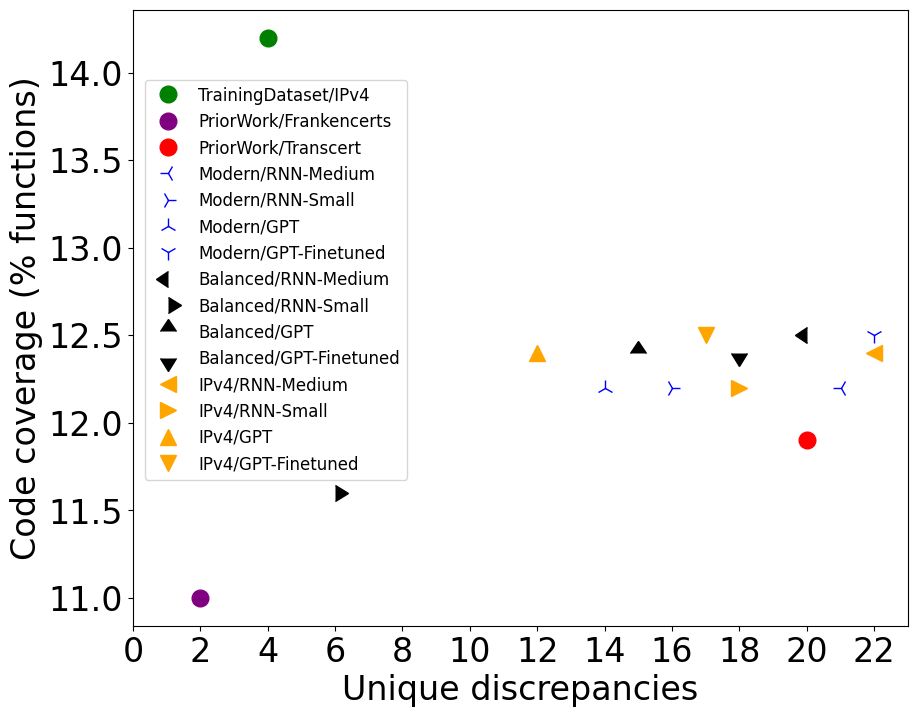

In [58]:
# To help with labels
labels_translation = {"v3/2022-scanned": "Modern/GPT-Finetuned",
                     "v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Medium",
                     "v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Modern/RNN-Small",
                     "v3/2022-scanned-custom": "Modern/GPT",
                     
                     "v3/balanced-versions": "Balanced/GPT-Finetuned",
                     "v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Medium",
                     "v3/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000": "Balanced/RNN-Small",
                     "v3/balanced-versions-custom": "Balanced/GPT",
                      
                     "v3/zmap-data": "IPv4/GPT-Finetuned",
                     "v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Medium",
                     "v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000": "IPv4/RNN-Small",
                     "v3/zmap-data-custom": "IPv4/GPT",
                      
                     "frankencerts-large/frankencerts-v1-8M": "PriorWork/Frankencerts",
                      "transcert/seeds30k": "PriorWork/Transcert",
                     "zmapOriginalCerts/zmapOriginalCerts": "TrainingDataset/IPv4"
                     }

fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(111)
print(models_disc.keys())

# Custom keys to make legend ordered
for m in ['zmapOriginalCerts/zmapOriginalCerts', 'frankencerts-large/frankencerts-v1-8M', 'transcert/seeds30k', 'v3/2022-scanned-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/2022-scanned-custom', 'v3/2022-scanned', 'v3/balanced-versions-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/balanced-versions-custom', 'v3/balanced-versions', 'v3/zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data-256-3-0.0002lr-0.1dropout-epoch3-step300000', 'v3/zmap-data-custom', 'v3/zmap-data']:
#     if "V3-EXPERIMENTS" not in m:
#         continue
       
#     if not "0T" in m:
#         continue
    
#     # Pick color
#     if "CHAIN" in m:
#         c = 'black'
#     elif "V1" in m:
#         c = 'blue'
#     elif "V3" in m and "EXPERIMENTS" in m:
#         c = 'red'
#     elif "V3" in m and "EXPERIMENTS" not in m:
#         c = 'orange'
#     elif "ORIGINAL" in m:
#         c = 'green'
#     else:
#         c = 'purple'
        
    if "zmapOriginalCerts" in m:
        c = 'green'
    elif "v3/2022" in m:
        c = 'blue'
    elif "v3/zmap" in m:
        c = 'orange'
    elif "v3/balanced" in m:
        c = 'black'
    elif "transcert" in m:
        c = 'red'
    else:
        c = 'purple'

    # Pick shape
    if "2022" in m:
        if "1024" in m:
            s = "3"
        elif "256" in m:
            s = "4"
        elif "custom" in m:
            s = "2"
        else:
            s = "1"

    elif "balanced" in m:
        if "1024" in m:
            s = 8
        elif "256" in m:
            s = 9
        elif "custom" in m:
            s = 10
        else:
            s = 11

    elif "zmap" in m and "zmapOriginalCerts" not in m:
        if "1024" in m:
            s = "<"
        elif "256" in m:
            s = ">"
        elif "custom" in m:
            s = "^"
        else:
            s = "v"
 
    else:
        s = "o"
    
    print(m, len(set(models_disc[m])))
    
    plt.plot(len(set(models_disc[m])), models_code_coverage[m], color=c, marker=s, label=labels_translation[m], linestyle='', markersize=12)
    #plt.scatter(len(set(models_disc[m])), models_code_coverage[m], label=m)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.005, 0.90))
plt.xlabel("Unique discrepancies")
plt.xticks(range(0, 24, 2))
plt.ylabel("Code coverage (% functions)")
plt.rcParams.update({'font.size': 24})
plt.savefig('/home/XYZ/notebook/MLcertsJupyter/Figures/coverageDiscrepancies.pdf', bbox_inches='tight')
#plt.show()